# Problem Statement 
The focus is on predicting the quality of wine based on its chemical characteristics, offering a
real-world application of machine learning in the context of viticulture. The dataset
encompasses diverse chemical attributes, including density and acidity, which serve as the
features for three distinct classifier models.

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
# loading data set
data = pd.read_csv("WineQT.csv")
data.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  Id  
0      9.4        5   0  
1      9.8        5   1  
2      9.8        5   2  
3      9.8        6   3  
4      9.4        5   4

In [3]:
# making copy of data
df = data.copy()
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  Id  
0      9.4        5   0  
1      9.8        5   1  
2      9.8        5   2  
3      9.8        6   3  
4      9.4        5   4

# EDA

In [4]:
df.shape # 1143 rows, 13 columns

(1143, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


All columns are in in correct data type, also there are no missing values in any column

In [6]:
# Looking for missing values
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

No missing values in data

In [7]:
df.nunique()

fixed acidity             91
volatile acidity         135
citric acid               77
residual sugar            80
chlorides                131
free sulfur dioxide       53
total sulfur dioxide     138
density                  388
pH                        87
sulphates                 89
alcohol                   61
quality                    6
Id                      1143
dtype: int64

No column in Dataframe hold single value

In [8]:
# We can drop column ID as it is not required for analysis
df.drop(columns=["Id"], inplace=True)

In [9]:
# Looking for duplicate data
df.duplicated().sum()

125

Out of 1143 rows 125 are duplicate rows so lets drop them

In [10]:
# droping duplicate values
df.drop_duplicates(inplace=True)

In [11]:
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
5            7.4              0.66         0.00             1.8      0.075   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
5                 13.0                  40.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
5      9.4        5

In [12]:
df.describe().T.style.background_gradient(cmap="Oranges")

- Average alcohol level is 10.45
- Average density is of 0.99 ie 1 
- Most of wine have quality socre of 5 and 6
- Total sulfur dioxide has a high standard deviation of 33.12, indicating significant variability.
- Minmum alcohol is 8.4% and Maximum is 14.9%
- Alcohol content and density are consistent, while total sulfur dioxide varies significantly.
- Features like volatile acidity and citric acid show smaller ranges, meaning less variation in these chemical properties across the wines.

In [13]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

## Visualizing data for better understanding

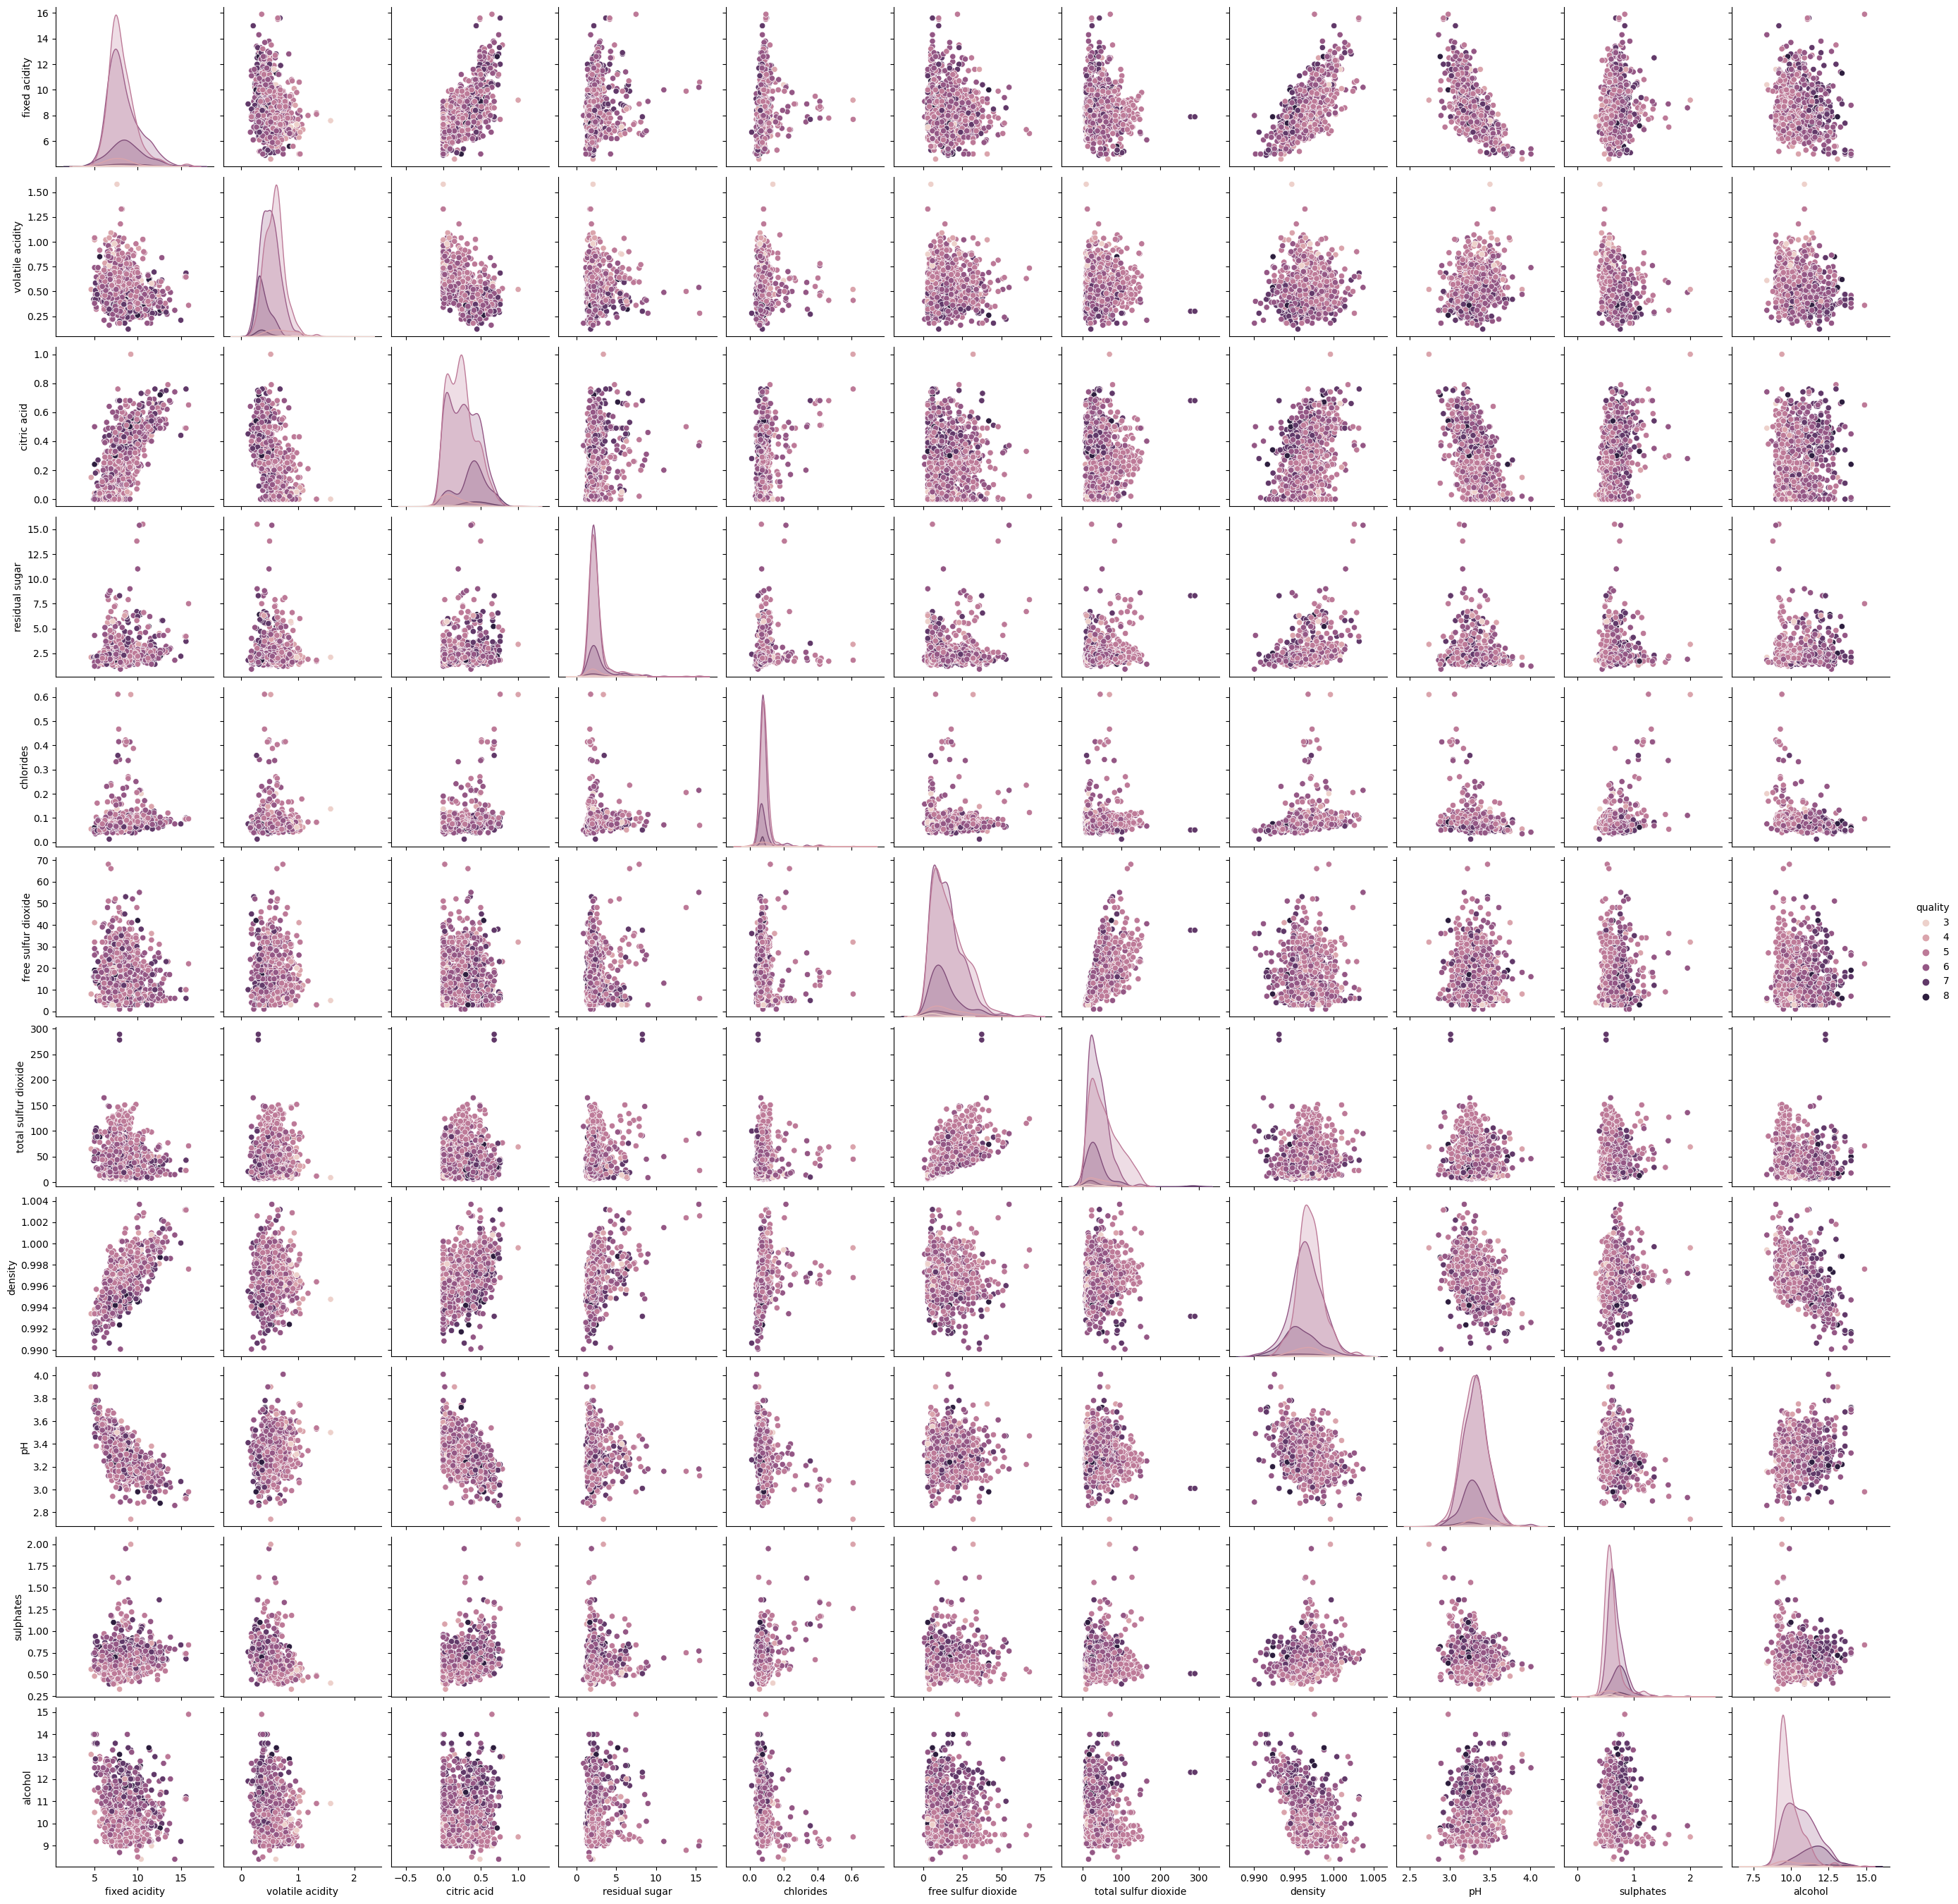

In [14]:
sns.pairplot(df, hue='quality', diag_kind='kde')
plt.show()

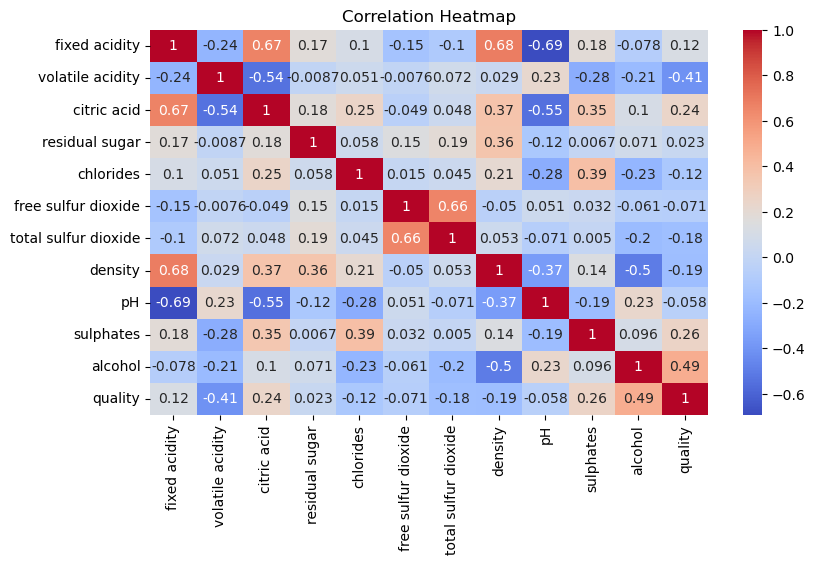

In [15]:
plt.figure(figsize=(9, 5))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

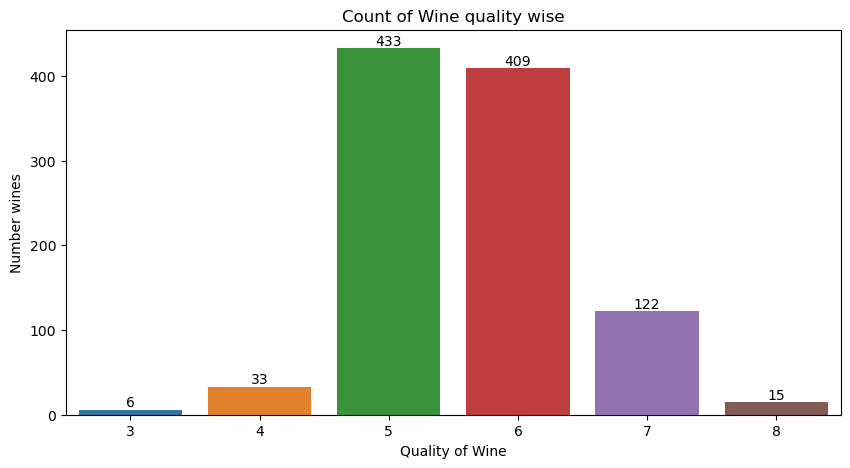

In [16]:
# counting number of wine with respect its quality
plt.figure(figsize=(10,5))
ax = sns.countplot(data = df, x = "quality")
plt.title("Count of Wine quality wise")
plt.xlabel("Quality of Wine")
plt.ylabel("Number wines")
ax.bar_label(ax.containers[0])
plt.show()

- Quality 5 has most number of wines
- Quality 6 has second largest number of wines
- where as quality 3, 4, 7, 8 does not hold much numbers

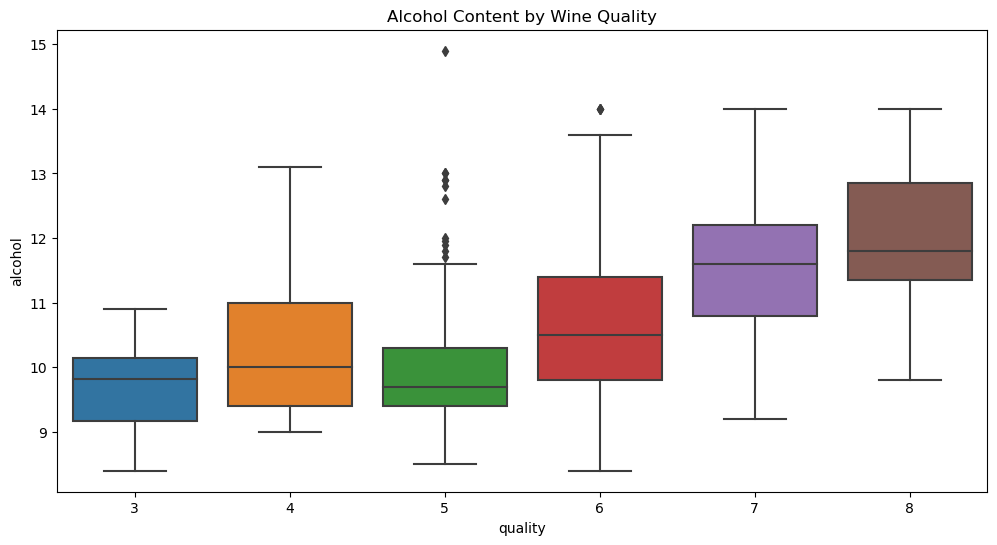

In [17]:
# box of quality with respect to alcohol
plt.figure(figsize=(12, 6))
sns.boxplot(x='quality', y='alcohol', data=df)
plt.title('Alcohol Content by Wine Quality')
plt.show()

We have outliers in 5th quality and one outlier in 6th quality

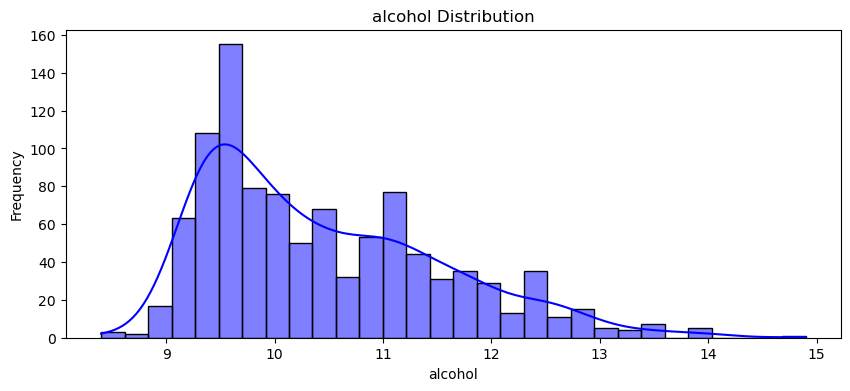

In [18]:
# Histogram of alcohol
plt.figure(figsize=(10,4))
sns.histplot(df["alcohol"], bins=30 ,kde=True, color="blue")
plt.title('alcohol Distribution')
plt.xlabel("alcohol")
plt.ylabel("Frequency")
plt.show()

In [19]:
print("Skewness: %f" % df['alcohol'].skew())
print("Kurtosis: %f" % df['alcohol'].kurt())

Skewness: 0.848859
Kurtosis: 0.162558


Here alcohol column data is positive skeweed, it won't affect Random forest algorithm but Stochastic Gradient Descent (SGD), and Support Vector Classifier (SVC) are sensitive to the scale of the features and their distribution, so we need to log transform this feautre

In [20]:
# Applying log transformation to the 'alcohol' column
df['log_alcohol'] = np.log(df['alcohol'])

print("Skewness: %f" % df['log_alcohol'].skew())
print("Kurtosis: %f" % df['log_alcohol'].kurt())

Skewness: 0.647884
Kurtosis: -0.323179


In [21]:
# replacing and renaming columns
df.drop(columns="alcohol", axis=1, inplace=True)

df.rename(columns={"log_alcohol": "alcohol"}, inplace=True)

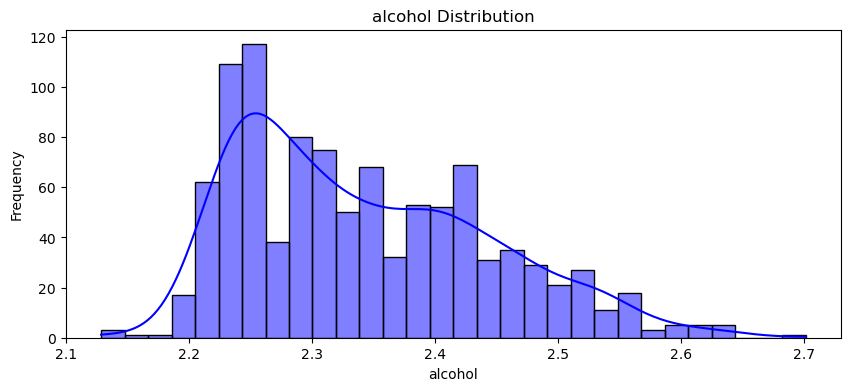

In [22]:
# Histogram of alcohol
plt.figure(figsize=(10,4))
sns.histplot(df["alcohol"], bins=30 ,kde=True, color="blue")
plt.title('alcohol Distribution')
plt.xlabel("alcohol")
plt.ylabel("Frequency")
plt.show()

After log transformation Skewness is reduced to 64% that is less than 75% which excepted

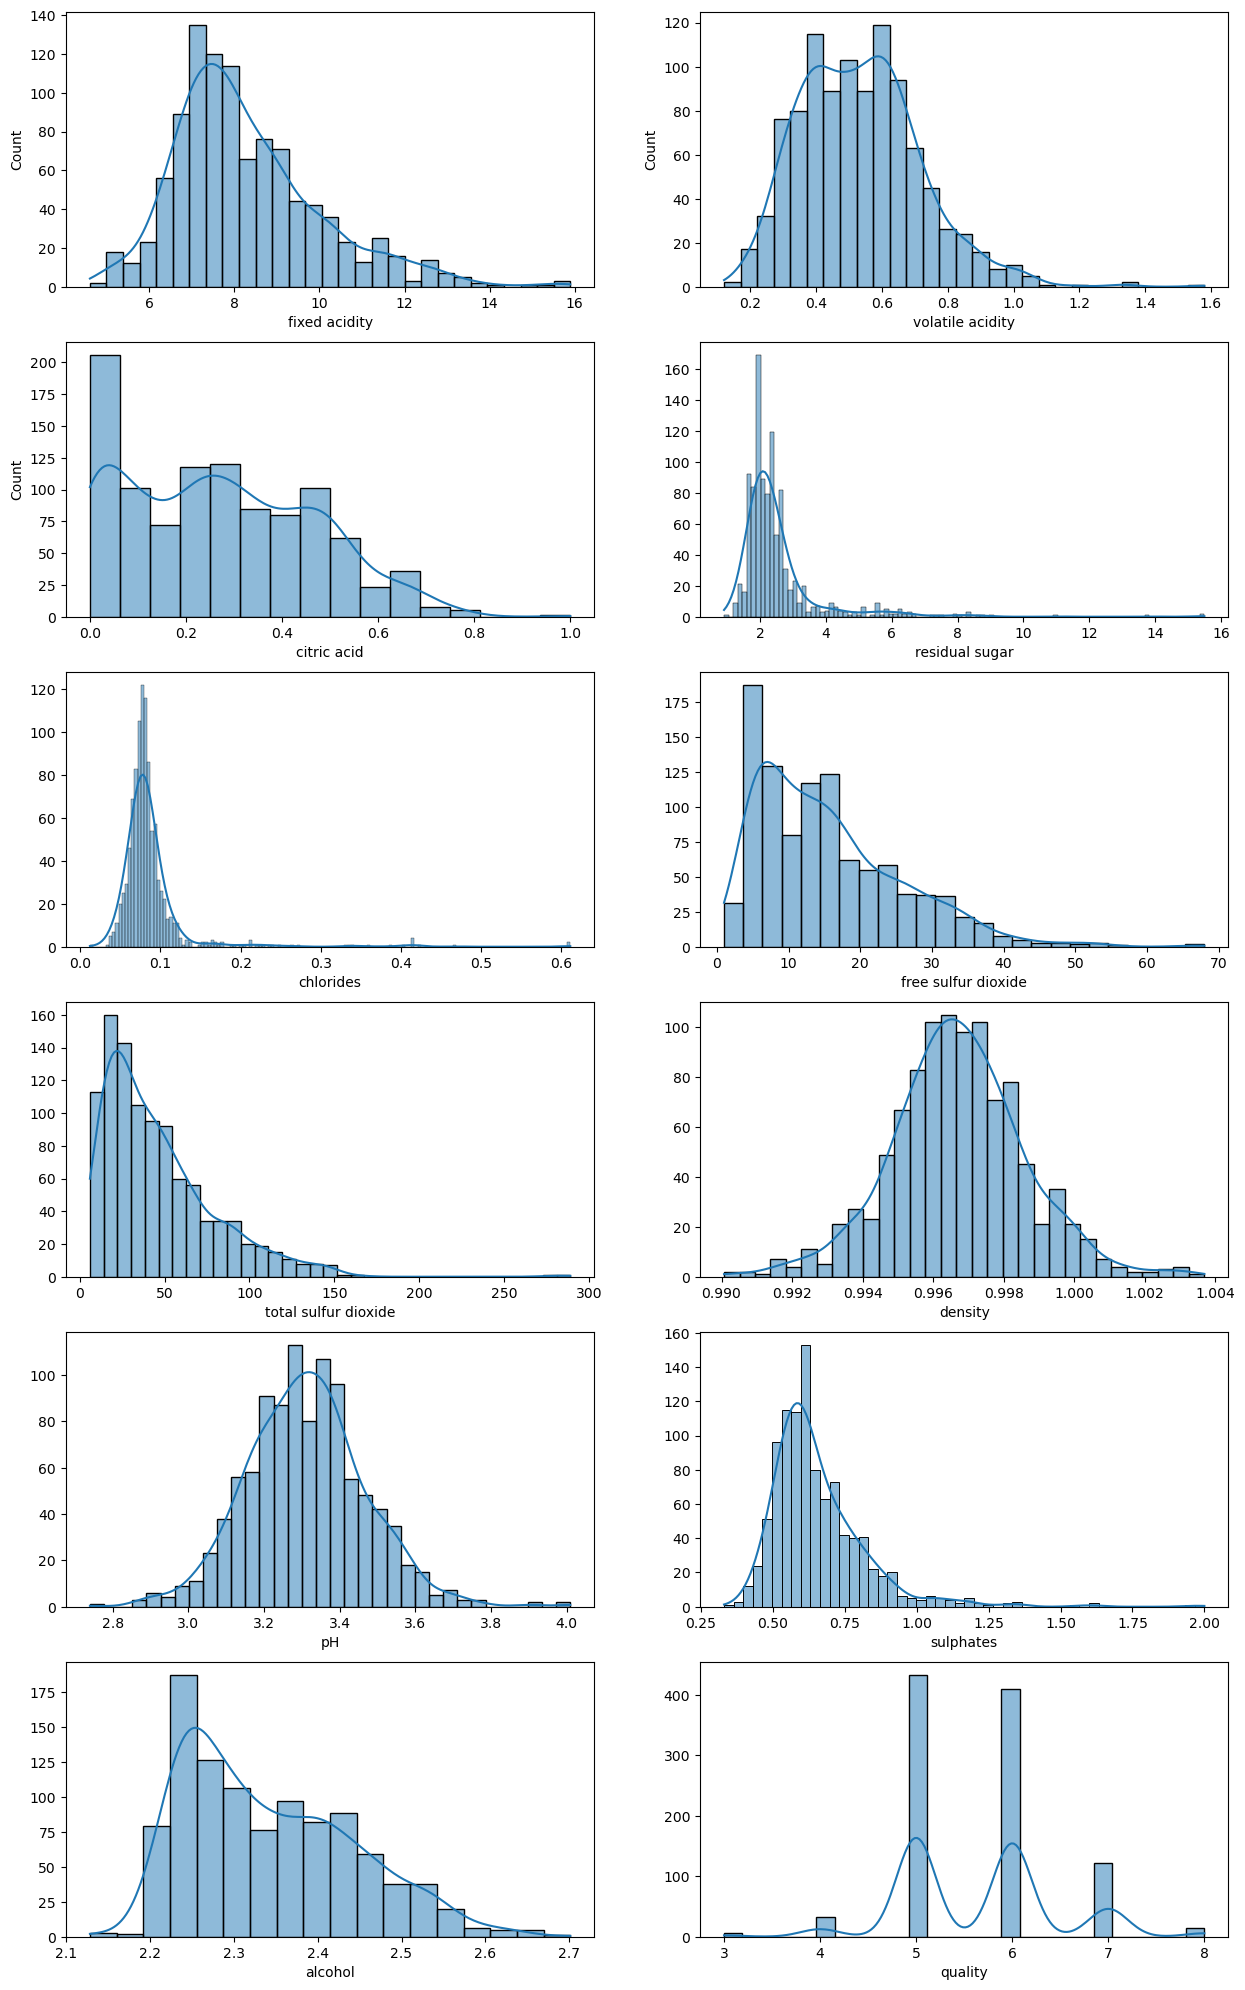

In [23]:
plt.figure(figsize=(15,25))

# fixed acidity
plt.subplot(6,2,1)
sns.histplot(df["fixed acidity"], kde=True)

#volatile acidity
plt.subplot(6,2,2)
sns.histplot(df["volatile acidity"], kde=True)

#citric acid
plt.subplot(6,2,3)
sns.histplot(df["citric acid"], kde=True)

#residual sugar
plt.subplot(6,2,4)
sns.histplot(df["residual sugar"], kde=True)
plt.ylabel("")

#chlorides
plt.subplot(6,2,5)
sns.histplot(df["chlorides"], kde=True)
plt.ylabel("")

#free sulfur dioxide
plt.subplot(6,2,6)
sns.histplot(df["free sulfur dioxide"], kde=True)
plt.ylabel("")

#total sulfur dioxide
plt.subplot(6,2,7)
sns.histplot(df["total sulfur dioxide"], kde=True)
plt.ylabel("")

#density
plt.subplot(6,2,8)
sns.histplot(df["density"], kde=True)
plt.ylabel("")

#pH
plt.subplot(6,2,9)
sns.histplot(df["pH"], kde=True)
plt.ylabel("")

#sulphates
plt.subplot(6,2,10)
sns.histplot(df["sulphates"], kde=True)
plt.ylabel("")

#alcohol
plt.subplot(6,2,11)
sns.histplot(df["alcohol"], kde=True)
plt.ylabel("")

#quality
plt.subplot(6,2,12)
sns.histplot(df["quality"], kde=True)
plt.ylabel("")


plt.show()

# Standardization
Scaling data as Stochastic Gradient Descent Classifier and Support Vector Classifier are sensitive to scale , also to bring all values on same scale

In [24]:
from sklearn.preprocessing import StandardScaler

# Separating features and target
X = df.drop(columns=['quality'])
y = df['quality']

# Scale the feature data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [25]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [26]:
X_scaled = pd.DataFrame(X_scaled, columns=df.drop(columns=['quality']).columns)

In [27]:
from sklearn.model_selection import train_test_split

# performing train test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=10)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(814, 11)
(204, 11)
(814,)
(204,)


# Random Forest Classifier

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Initializing model 
rf_model = RandomForestClassifier(n_estimators=100, random_state=10)

#traing
rf_model.fit(X_train, y_train)

# Make predictions
rf_predictions = rf_model.predict(X_test)

# Evaluate the model
print("Random Forest Classifier")
print(confusion_matrix(y_test, rf_predictions))
print(classification_report(y_test, rf_predictions))
print("Accuracy:", round(accuracy_score(y_test, rf_predictions),3))

Random Forest Classifier
[[ 0  5  1  0  0]
 [ 0 67 15  1  0]
 [ 0 31 49  4  0]
 [ 0  3 18  7  0]
 [ 0  0  2  1  0]]
              precision    recall  f1-score   support

           4       0.00      0.00      0.00         6
           5       0.63      0.81      0.71        83
           6       0.58      0.58      0.58        84
           7       0.54      0.25      0.34        28
           8       0.00      0.00      0.00         3

    accuracy                           0.60       204
   macro avg       0.35      0.33      0.33       204
weighted avg       0.57      0.60      0.57       204

Accuracy: 0.603


# Stochastic Gradient Descent Classifier

In [29]:
from sklearn.linear_model import SGDClassifier


# Initializing model 
sgd_model = SGDClassifier(loss='log_loss', random_state=10)

#traing
sgd_model.fit(X_train, y_train)

# Make predictions
sgd_predictions = sgd_model.predict(X_test)

# Evaluate the model
print("\nStochastic Gradient Descent Classifier")
print(confusion_matrix(y_test, sgd_predictions))
print(classification_report(y_test, sgd_predictions))
print("Acurracy:", round(accuracy_score(y_test, sgd_predictions),3))


Stochastic Gradient Descent Classifier
[[ 0  4  2  0  0]
 [ 0 59 21  3  0]
 [ 1 37 26 20  0]
 [ 0  5  7 16  0]
 [ 0  0  0  3  0]]
              precision    recall  f1-score   support

           4       0.00      0.00      0.00         6
           5       0.56      0.71      0.63        83
           6       0.46      0.31      0.37        84
           7       0.38      0.57      0.46        28
           8       0.00      0.00      0.00         3

    accuracy                           0.50       204
   macro avg       0.28      0.32      0.29       204
weighted avg       0.47      0.50      0.47       204

Acurracy: 0.495


# Support Vector Classifier

In [30]:
from sklearn.svm import SVC

# Initializing model 
svc_model = SVC(kernel='linear', random_state=10) 

#traing
svc_model.fit(X_train, y_train)

# Make predictions
svc_predictions = svc_model.predict(X_test)

# Evaluate the model
print("\nSupport Vector Classifier")
print(confusion_matrix(y_test, svc_predictions))
print(classification_report(y_test, svc_predictions))
print("Accuracy:", accuracy_score(y_test, svc_predictions))


Support Vector Classifier
[[ 0  5  1  0  0]
 [ 0 66 16  1  0]
 [ 0 31 50  3  0]
 [ 0  3 17  8  0]
 [ 0  0  3  0  0]]
              precision    recall  f1-score   support

           4       0.00      0.00      0.00         6
           5       0.63      0.80      0.70        83
           6       0.57      0.60      0.58        84
           7       0.67      0.29      0.40        28
           8       0.00      0.00      0.00         3

    accuracy                           0.61       204
   macro avg       0.37      0.34      0.34       204
weighted avg       0.58      0.61      0.58       204

Accuracy: 0.6078431372549019


In [31]:
# making dictionary of results
results = {}

results['Random Forest'] = {
    'Accuracy': accuracy_score(y_test, rf_predictions)}

results['SGD'] = {
    'Accuracy': accuracy_score(y_test, sgd_predictions)}

results['SVC'] = {
    'Accuracy': accuracy_score(y_test, svc_predictions)}

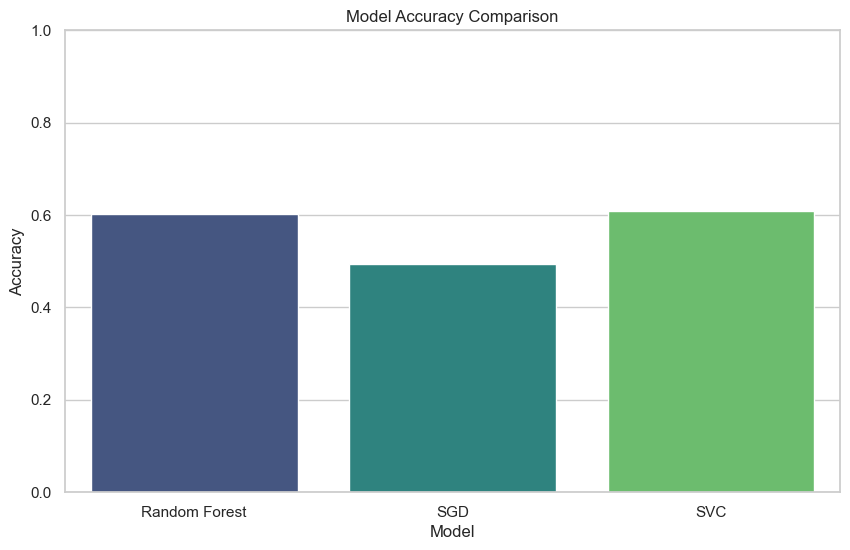

In [32]:
# Create a summary DataFrame
results_df = pd.DataFrame({
    'Model': list(results.keys()),
    'Accuracy': [value['Accuracy'] for value in results.values()]
})

# Set the style of seaborn
sns.set(style='whitegrid')

# Create a bar plot for accuracy
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Accuracy', data=results_df, palette='viridis')
plt.title('Model Accuracy Comparison')
plt.ylim(0, 1)
plt.ylabel('Accuracy')
plt.xlabel('Model')

plt.show()

# Insights

- The average alcohol level in the wines was found to be approximately 10.45%, with a maximum of 14.9% and a minimum of 8.4%.
- The majority of the wines had quality scores of 5 and 6, indicating a general trend towards these quality ratings in the dataset.

# Recommendations

**Random Forest Classifier:**<br>Achieved an accuracy of approximately 60.3%. It performed reasonably well, particularly for quality scores of 5 and 6, but struggled with lower-quality scores (3 and 4).<br>
**Stochastic Gradient Descent Classifier:**<br>Recorded an accuracy of around 49.5%. This model showed limitations in distinguishing between quality scores, with a noticeable drop in performance compared to Random Forest.<br>
**Support Vector Classifier:**<br>Achieved the highest accuracy at about 60.8%. Similar to Random Forest, it performed well on higher-quality wines but had difficulty with lower ratings.

# Conclusions:

**Model Selection:** For predicting wine quality, both Random Forest and SVC are viable options, with Random Forest providing slightly better performance. The choice between these models may depend on further considerations like interpretability and training time.